In [1]:
import pandas as pd
import numpy as np

In [2]:
fire_data_df = pd.read_csv("Fire_Data.csv",low_memory=False)
fire_data_df.head()

,FPA_ID,FIRE_NAME,FIRE_YEAR,DISCOVERY_DOY,DISCOVERY_TIME,STAT_CAUSE_DESCR,CONT_DOY,CONT_TIME,FIRE_SIZE,FIRE_SIZE_CLASS,LATITUDE,LONGITUDE,OWNER_CODE,OWNER_DESCR,STATE,COUNTY
0,FS-1418826,FOUNTAIN,2005,33,1300.0,Miscellaneous,33.0,1730.0,0.10,A,40.036944,-121.005833,5.0,USFS,CA,63
1,FS-1418827,PIGEON,2004,133,845.0,Lightning,133.0,1530.0,0.25,A,38.933056,-120.404444,5.0,USFS,CA,61
2,FS-1418835,SLACK,2004,152,1921.0,Debris Burning,152.0,2024.0,0.10,A,38.984167,-120.735556,13.0,STATE OR PRIVATE,CA,17
3,FS-1418845,DEER,2004,180,1600.0,Lightning,185.0,1400.0,0.10,A,38.559167,-119.913333,5.0,USFS,CA,3
4,FS-1418847,STEVENOT,2004,180,1600.0,Lightning,185.0,1200.0,0.10,A,38.559167,-119.933056,5.0,USFS,CA,3


In [3]:
yr_state_grp = fire_data_df.groupby(["FIRE_YEAR","STATE"])
avg_fire_size_df = pd.DataFrame(yr_state_grp.FIRE_SIZE.mean()).reset_index()

In [4]:
avg_fire_size_pivot = avg_fire_size_df.pivot("FIRE_YEAR","STATE").unstack(fill_value=0)
avg_fire_size_pivot

           STATE  FIRE_YEAR
FIRE_SIZE  AK     1992         296.709771
                  1993         798.131823
                  1994         409.320156
                  1995         105.172488
                  1996         833.979387
                                  ...    
           WY     2011         210.672781
                  2012         461.095086
                  2013          93.497074
                  2014          12.984689
                  2015          58.261432
Length: 1248, dtype: float64

In [6]:
years = np.arange(fire_data_df.FIRE_YEAR.min(),fire_data_df.FIRE_YEAR.max()+1)
years

array([1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002,
       2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013,
       2014, 2015], dtype=int64)

In [21]:
ca_avg_fire_size = avg_fire_size_pivot.loc[:,["CA"]]
ga_avg_fire_size = avg_fire_size_pivot.loc[:,["GA"]]
tx_avg_fire_size = avg_fire_size_pivot.loc[:,["TX"]]
nc_avg_fire_size = avg_fire_size_pivot.loc[:,["NC"]]

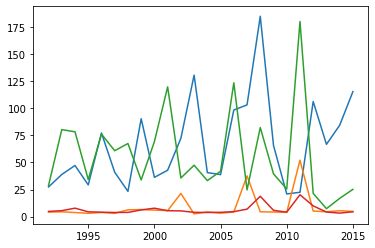

In [22]:
import matplotlib.pyplot as plt
plt.plot(years,ca_avg_fire_size)
plt.plot(years,ga_avg_fire_size)
plt.plot(years,tx_avg_fire_size)
plt.plot(years,nc_avg_fire_size)
plt.show()

In [12]:
fire_data_df.STAT_CAUSE_DESCR.value_counts()

Debris Burning       429028
Miscellaneous        323805
Arson                281455
Lightning            278468
Missing/Undefined    166723
Equipment Use        147612
Campfire              76139
Children              61167
Smoking               52869
Railroad              33455
Powerline             14448
Fireworks             11500
Structure              3796
Name: STAT_CAUSE_DESCR, dtype: int64

In [13]:
fire_data_df.FIRE_SIZE_CLASS.value_counts()

B    939376
A    666919
C    220077
D     28427
E     14107
F      7786
G      3773
Name: FIRE_SIZE_CLASS, dtype: int64

In [14]:
fire_data_df.STATE.value_counts()

CA    189550
GA    168867
TX    142021
NC    111277
FL     90261
SC     81315
NY     80870
MS     79230
AZ     71586
AL     66570
OR     61088
MN     44769
OK     43239
MT     40767
NM     37478
ID     36698
CO     34157
WA     33513
WI     31861
AR     31663
TN     31154
SD     30963
UT     30725
LA     30013
KY     27089
NJ     25949
PR     22081
WV     21967
VA     21833
MO     17953
NV     16956
ND     15201
WY     14166
ME     13150
AK     12843
MI     10502
HI      9895
PA      8712
NE      7973
KS      7673
CT      4976
IA      4134
MD      3622
OH      3479
MA      2626
NH      2452
IL      2327
IN      2098
RI       480
VT       456
DE       171
DC        66
Name: STATE, dtype: int64

In [15]:
import gmaps
from config import gkey
# Configure gmaps with API key
gmaps.configure(api_key=gkey)

In [16]:
# Store locations 
locations = fire_data_df[["LATITUDE", "LONGITUDE"]].astype(float)

# Convert to float and store
fire_size = fire_data_df["FIRE_SIZE"].astype(float)

In [17]:
# Create a Heatmap layer
fig = gmaps.figure(map_type="TERRAIN")

heat_layer = gmaps.heatmap_layer(locations, weights=fire_size, 
                                 dissipating=False, max_intensity=10,
                                 point_radius = .05)

fig.add_layer(heat_layer)

fig

Figure(layout=FigureLayout(height='420px'))